In [142]:
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from sklearn.metrics import r2_score,mean_squared_error

In [143]:
df=pd.read_csv("./datasets/concrete_data.csv")

In [144]:
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [146]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [147]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [148]:
df.duplicated().sum()

25

In [149]:
df.drop_duplicates(inplace=True)

In [150]:
df.shape

(1005, 9)

In [151]:
X,y=(df.iloc[:,0:8],df.iloc[:,8:9])

In [152]:
X.shape, y.shape

((1005, 8), (1005, 1))

In [153]:
X.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [154]:
y.head(3)

,Strength
0,79.99
1,61.89
2,40.27


# Split the data

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [156]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((753, 8), (252, 8), (753, 1), (252, 1))

# Train before PowerTransformation

In [157]:
lr=LinearRegression()

In [158]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(r2_score(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(cross_val_score(lr,X_train,y_train,cv=5).mean())

0.349417618423843
109.16005811113054
0.5813458851405132


# Showing data has normal distribution or not

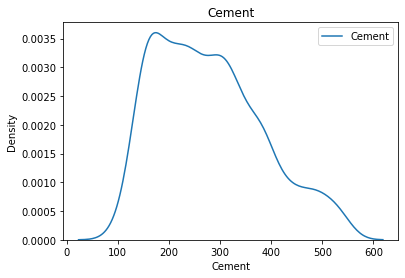

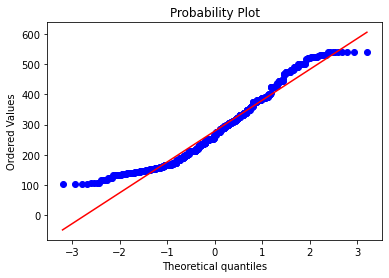

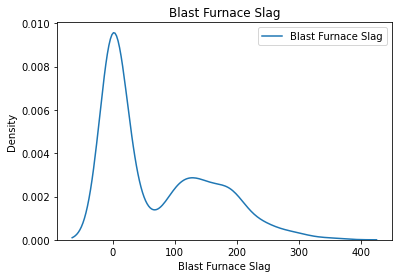

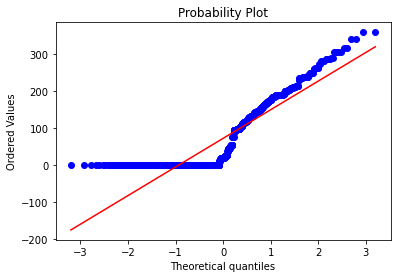

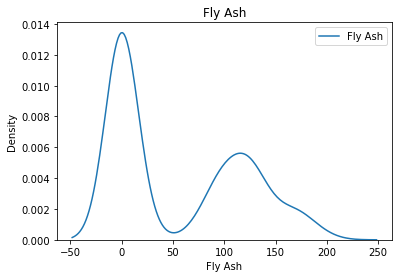

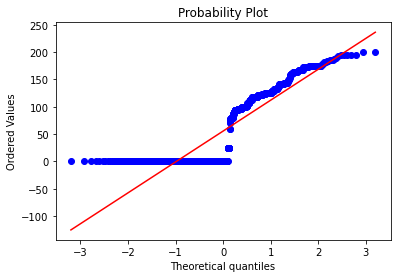

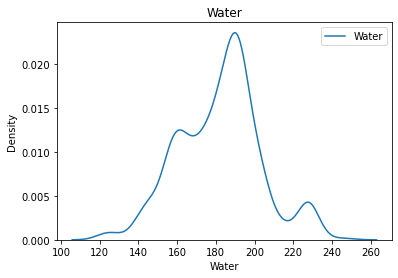

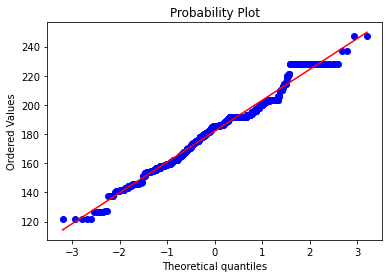

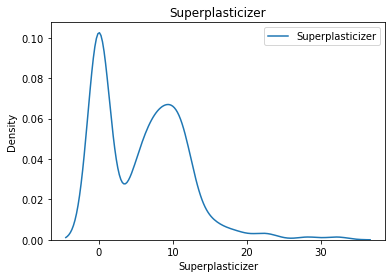

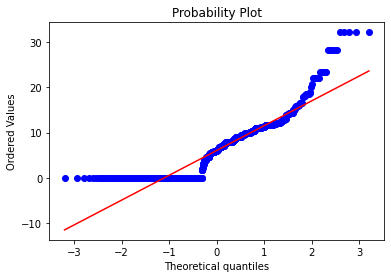

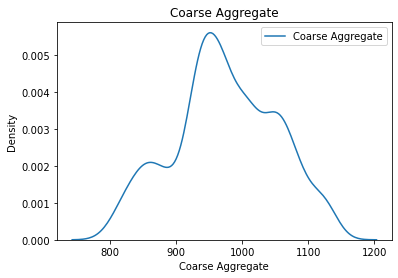

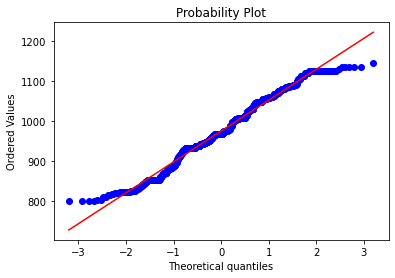

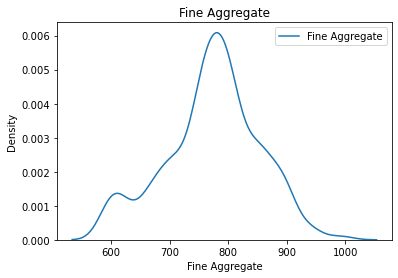

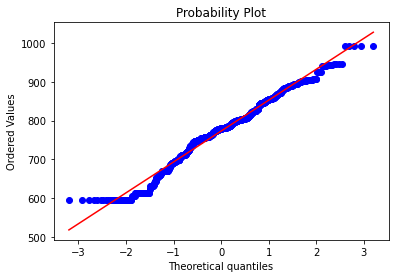

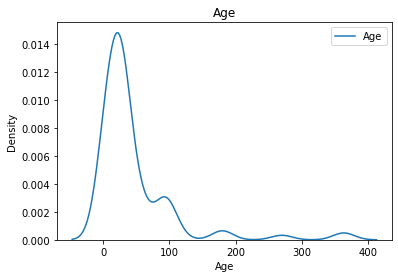

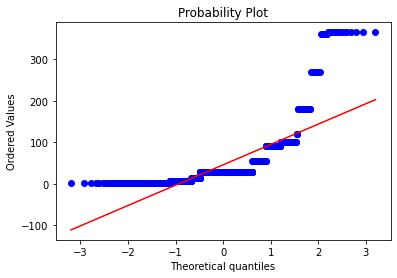

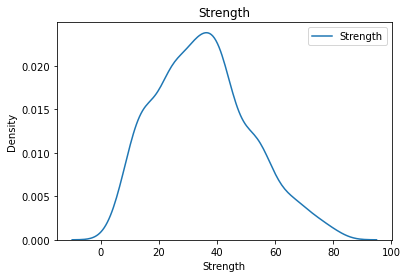

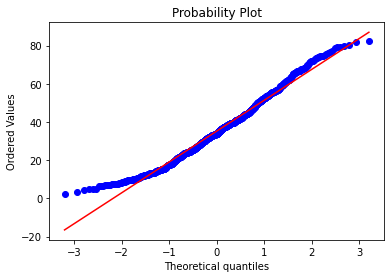

In [159]:
for col in df.columns:
    plt.title(col)
    sns.kdeplot(df[col],label=col)
    plt.legend()
    plt.show()
    plt.title("QQ plot")
    stat.probplot(df[col],dist="norm",plot=plt)
    plt.show()
    

# PowerTransformation

In [160]:
pt=PowerTransformer()

In [161]:
pt.fit(X_train)
X_train_transformed=pt.transform(X_train)
X_test_transformed=pt.transform(X_test)


In [162]:
X_train=pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test=pd.DataFrame(X_test_transformed, columns=X_test.columns)

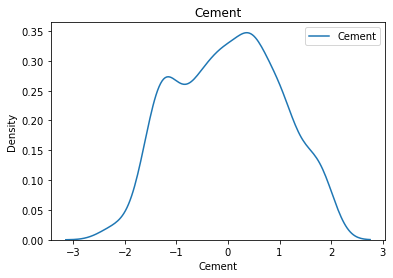

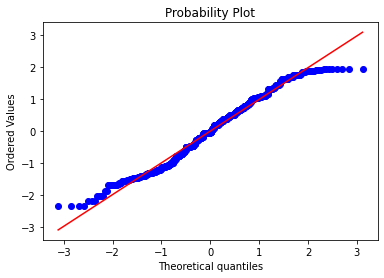

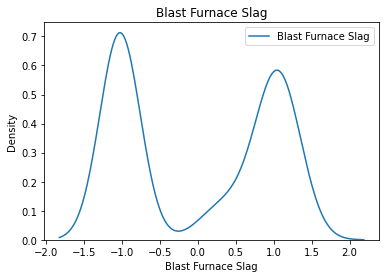

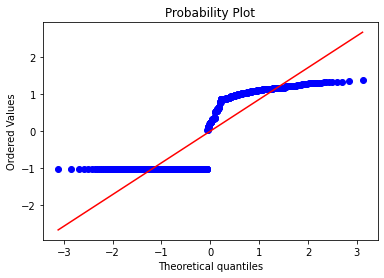

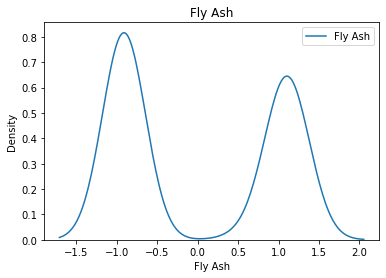

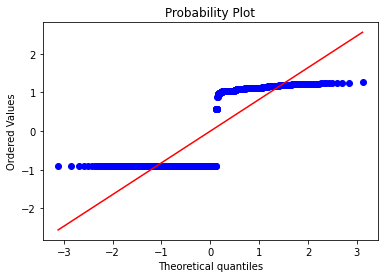

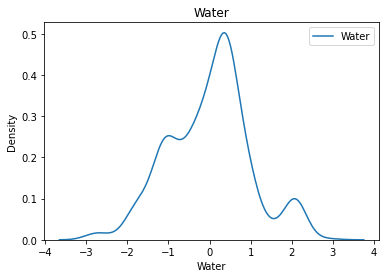

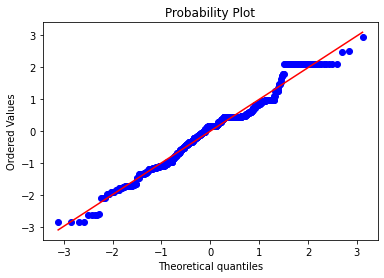

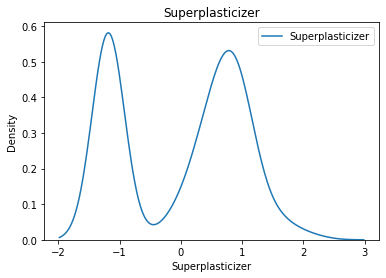

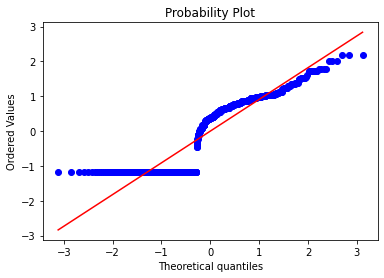

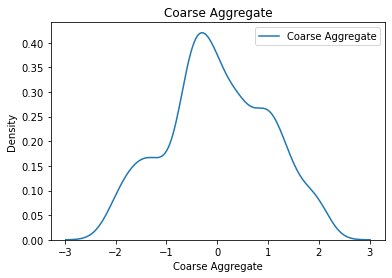

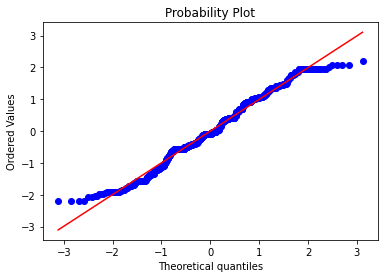

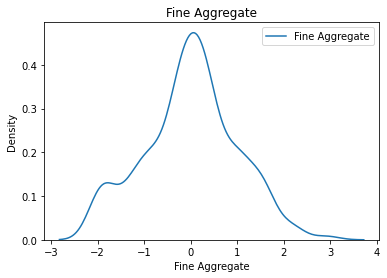

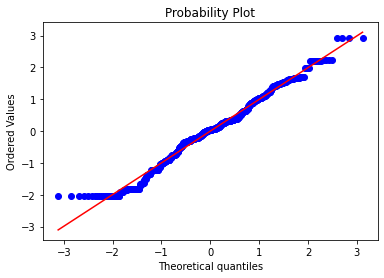

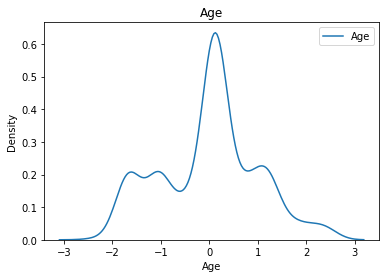

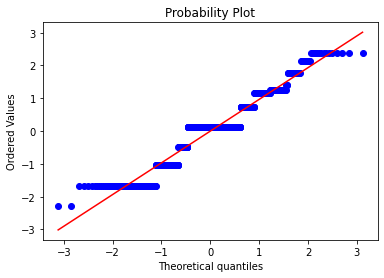

In [165]:
for col in X_train.columns:
    plt.title(col)
    sns.kdeplot(X_train[col],label=col)
    plt.legend()
    plt.show()
    plt.title("QQ plot")
    stat.probplot(X_train[col],dist="norm",plot=plt)
    plt.show()

In [166]:
X_train.sample(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
94,-0.887418,1.280624,-0.912138,0.145425,-1.184223,0.476258,-0.727548,-1.03975
295,0.448506,-1.024522,1.046889,0.621570,0.864764,-0.209033,-0.834197,0.12164


In [167]:
X_test.sample(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
120,0.564241,1.182968,-0.912138,-1.252705,1.230142,-1.554414,1.347084,-1.03975
169,-0.195180,-1.024522,1.027816,0.191734,0.533915,-0.324959,0.904474,0.12164


In [168]:
np.round(X_train.describe())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,753.0,753.0,753.0,753.0,753.0,753.0,753.0,753.0
mean,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-1.0,-3.0,-1.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,0.0,-1.0,0.0,0.0,-0.0,0.0,0.0
75%,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
max,2.0,1.0,1.0,3.0,2.0,2.0,3.0,2.0


In [169]:
np.round(X_test.describe())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
mean,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-1.0,-3.0,-1.0,-2.0,-2.0,-2.0
25%,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0
50%,0.0,0.0,-1.0,0.0,1.0,-0.0,0.0,0.0
75%,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
max,2.0,1.0,1.0,3.0,2.0,2.0,3.0,2.0


In [170]:
X_train.shape,X_test.shape

((753, 8), (252, 8))

# Train After PowerTransformer

In [171]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(r2_score(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(cross_val_score(lr,X_train,y_train,cv=5).mean())

0.7446822234078521
52.26347621931898
0.7870322291618509
